<a href="https://colab.research.google.com/github/DeisyData/Fundamentos_IA/blob/main/S5_C2_EDA_marketing_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Exploratory Data Analysis ( Análisis Exploratorio de Datos) Campañas de marketing


* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
* Response (target): 1 if customer accepted the offer in the last campaign, 0 otherwise.
* Complain: 1 if customer complained in the last 2 years.
* DtCustomer: Date of customer’s enrollment with the company.
* Education: Customer’s level of education.
* Marital: Customer’s marital status.
* Kidhome: Number of small children in customer’s household.
* Teenhome: Number of teenagers in customer’s household.
* Income: Customer’s yearly household income.
* MntFishProducts: Amount spent on fish products in the last 2 years.
* MntMeatProducts: Amount spent on meat products in the last 2 years.
* MntFruits: Amount spent on fruit products in the last 2 years.
* MntSweetProducts: Amount spent on sweet products in the last 2 years.
* MntWines: Amount spent on wine products in the last 2 years.
* MntGoldProds: Amount spent on gold products in the last 2 years.
* NumDealsPurchases: Number of purchases made with a discount.
* NumCatalogPurchases: Number of purchases made using a catalog.
* NumStorePurchases: Number of purchases made directly in stores.
* NumWebPurchases: Number of purchases made through the company’s website.
* NumWebVisitsMonth: Number of visits to the company’s website in the last month.
* Recency: Number of days since the last purchase.
* Year_Birth:


* Education: Customer’s level of education.
* Marital: Customer’s marital status.
* Income: Customer’s yearly household income.
* Year_Birth:

In [1]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas

In [2]:
# df: data frame
# pd: pandas
df = pd.read_csv('/content/marketing_campaign.csv', sep=';')
# para .csv  pd.read_csv('/content/marketing_campaign.xlsx')

In [3]:
# Información del número
# Columnas: atributos, características
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Describe me entrega un resumen solo de los atributos númericos
# count= número de registros
# mean= promedio
# std = desviación
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# Qué tamaño tiene el data set?
df.shape

(2240, 29)

In [6]:
# Qué categorías de educación?
print(df['Education'].unique())

## Observa: que hay 5 categorias en educación
## Un atributo categorico tiene clases finitas, siempre será del tipo object

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [7]:
# Qué categorás de estado civil?
df['Marital_Status'].unique()

## Obseva: para esta civil hay 8 categorías
## YOLO: You Only Live Once

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [8]:
# Qué edad tienen los clientes?

# tengo el atributo Año de Nacimiento : Year_Birth
# Debo crear un nuevo atributo/columna calculado
from datetime import date

# Calcular en año actual
año_actual = date.today().year
print(año_actual)


2025


In [9]:
df['Year_Birth']

,Year_Birth
0,1957
1,1954
2,1965
3,1984
4,1981
...,...
2235,1967
2236,1946
2237,1981
2238,1956


In [10]:
# Edad = Año actual - año nacimiento
año_nacimiento = df['Year_Birth']
edad = año_actual-año_nacimiento
# Se crea una nueva columna y se guardan los datos de edad
df['Edad'] = año_actual - año_nacimiento

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df = df.sort_index(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcceptedCmp1         2240 non-null   int64  
 1   AcceptedCmp2         2240 non-null   int64  
 2   AcceptedCmp3         2240 non-null   int64  
 3   AcceptedCmp4         2240 non-null   int64  
 4   AcceptedCmp5         2240 non-null   int64  
 5   Complain             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Edad                 2240 non-null   int64  
 8   Education            2240 non-null   object 
 9   ID                   2240 non-null   int64  
 10  Income               2216 non-null   float64
 11  Kidhome              2240 non-null   int64  
 12  Marital_Status       2240 non-null   object 
 13  MntFishProducts      2240 non-null   int64  
 14  MntFruits            2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [13]:
# Exportar los datos con la columan nueva  a excel
df.to_excel('marketing_edad.xlsx')

In [14]:
sub_df = df[['Marital_Status','Edad']]
sub_df.head(5)


,Marital_Status,Edad
0,Single,68
1,Single,71
2,Together,60
3,Together,41
4,Married,44


# Grafica Scatter
Dispersión Grafica puntos

Text(0.5, 1.0, 'Edad vs Gasto en Vino')

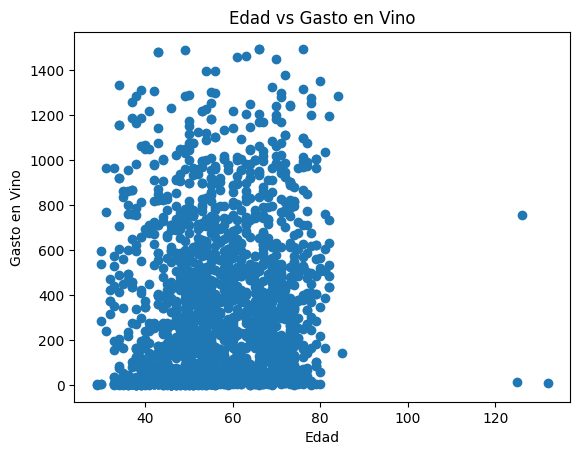

In [15]:
x = df['Edad']
y = df['MntWines']
plt.scatter(x,y)
plt.xlabel('Edad')
plt.ylabel('Gasto en Vino')
plt.title('Edad vs Gasto en Vino')

In [17]:
import numpy as np

#Distribución
medidas de tendencia central

In [36]:
promedioEdad = round(np.mean(df['Edad']),2)
print("La edad promedio es ", promedioEdad)
desvEdad = round(np.std(df['Edad']),2)
desvEdad

La edad promedio es  56.19


11.98

In [22]:
df['Edad'].describe()

,Edad
count,2240.000000
mean,56.194196
std,11.984069
min,29.000000
25%,48.000000
50%,55.000000
75%,66.000000
max,132.000000


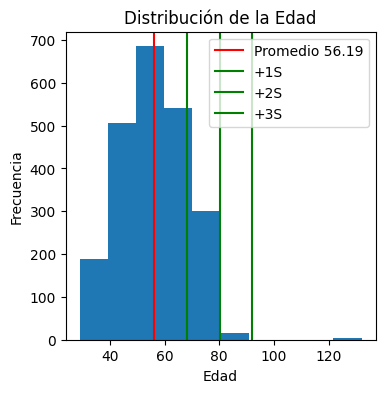

In [38]:
plt.figure(figsize=(4,4))
plt.hist(df['Edad'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.axvline(promedioEdad, color = "red", label = f'Promedio {promedioEdad}')
plt.axvline(promedioEdad + desvEdad , color = "green", label = f'+1S')
plt.axvline(promedioEdad + 2*desvEdad , color = "green", label = f'+2S')
plt.axvline(promedioEdad + 3*desvEdad , color = "green", label = f'+3S')
plt.legend()

<Axes: xlabel='Edad', ylabel='Density'>

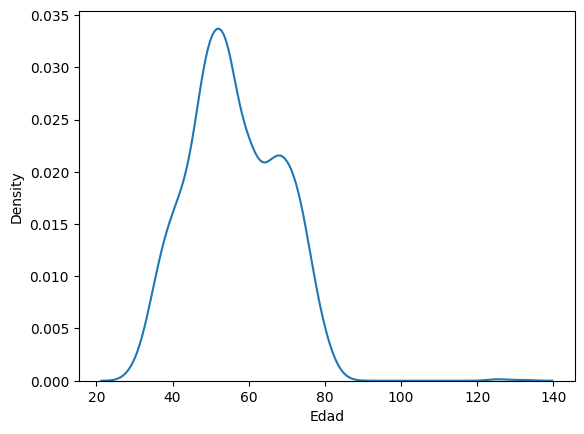

In [26]:
sns.kdeplot(df['Edad'])

# Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x799736e34290>,
 'caps': [<matplotlib.lines.Line2D at 0x799736e36f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x799739257b10>],
 'medians': [<matplotlib.lines.Line2D at 0x799736e35310>],
 'fliers': [<matplotlib.lines.Line2D at 0x79973b9b8e90>],
 'means': []}

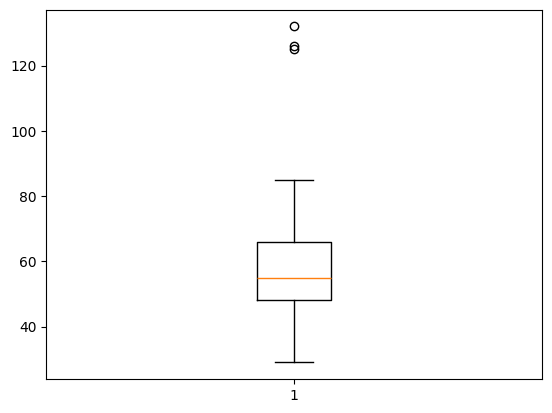

In [35]:
plt.boxplot(df['Edad'])

# Eliminando los Outliers ( Atípicos)

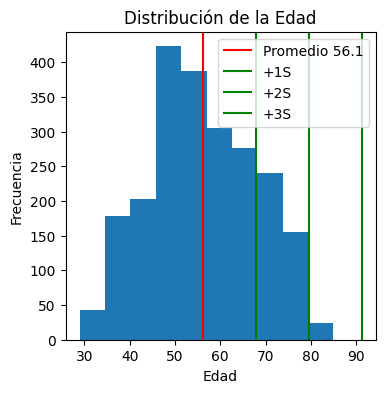

In [44]:
# 3 desviaciones
limite_superior = promedioEdad + 3*desvEdad
limite_inferior = promedioEdad - 3*desvEdad

df['Edad'] = df[df['Edad'] >= limite_inferior]['Edad']
df['Edad'] = df[df['Edad'] <= limite_superior]['Edad']

promedioEdad = round(np.mean(df['Edad']),2)
desvEdad = round(np.std(df['Edad']),2)

plt.figure(figsize=(4,4))
plt.hist(df['Edad'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.axvline(promedioEdad, color = "red", label = f'Promedio {promedioEdad}')
plt.axvline(promedioEdad + desvEdad , color = "green", label = f'+1S')
plt.axvline(promedioEdad + 2*desvEdad , color = "green", label = f'+2S')
plt.axvline(promedioEdad + 3*desvEdad , color = "green", label = f'+3S')
plt.legend()
